# College Majors and Salaries

We will explore the PayScale dataset of college majors to answer questions about starting salaries, mid-career salaries, earning potential, and risk. This notebook uses pandas for data manipulation and matplotlib / seaborn for visualization.

Questions we will answer:
- Which degrees have the highest starting salaries?
- Which majors have the lowest earnings after college?
- Which degrees have the highest earning potential?
- What are the lowest risk college majors from an earnings standpoint?
- Do Business, STEM or HASS degrees earn more on average?

In [5]:
# Standard imports for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots display nicely in the notebook
%matplotlib inline
sns.set(style="whitegrid", context="talk")

In [6]:
# Load the CSV that is included in the repository
csv_path = r'./salaries_by_college_major.csv'
df = pd.read_csv(csv_path)
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


In [7]:
# Quick inspection: info, shape, nulls and summary
print('shape:', df.shape)
print('info:')
print(df.info())

print('nulls per column:', df.isnull().sum())

# Convert columns to numeric if they aren't already (they appear numeric already)
numeric_cols = [c for c in df.columns if 'Salary' in c or 'Percentile' in c]
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Show descriptive stats for salary columns
df[numeric_cols].describe()

shape: (51, 6)
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Undergraduate Major                51 non-null     object 
 1   Starting Median Salary             50 non-null     float64
 2   Mid-Career Median Salary           50 non-null     float64
 3   Mid-Career 10th Percentile Salary  50 non-null     float64
 4   Mid-Career 90th Percentile Salary  50 non-null     float64
 5   Group                              50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB
None
nulls per column: Undergraduate Major                  0
Starting Median Salary               1
Mid-Career Median Salary             1
Mid-Career 10th Percentile Salary    1
Mid-Career 90th Percentile Salary    1
Group                                1
dtype: int64


,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000
mean,44310.000000,74786.00000,43408.000000,142766.000000
std,9360.866217,16088.40386,12000.779567,27851.249267
min,34000.000000,52000.00000,26700.000000,96400.000000
25%,37050.000000,60825.00000,34825.000000,124250.000000
50%,40850.000000,72000.00000,39400.000000,145500.000000
75%,49875.000000,88750.00000,49850.000000,161750.000000
max,74300.000000,107000.00000,71900.000000,210000.000000


## 1) Which degrees have the highest starting salaries?
We'll sort by `Starting Median Salary` and display the top majors.

In [8]:
top_starting = df.sort_values(by='Starting Median Salary', ascending=False).head(10)
top_starting[['Undergraduate Major','Starting Median Salary']].style.format({'Starting Median Salary':'${:,.0f}'})

,Undergraduate Major,Starting Median Salary
43,Physician Assistant,"$74,300"
8,Chemical Engineering,"$63,200"
12,Computer Engineering,"$61,400"
19,Electrical Engineering,"$60,900"
38,Mechanical Engineering,"$57,900"
1,Aerospace Engineering,"$57,700"
30,Industrial Engineering,"$57,700"
13,Computer Science,"$55,900"
40,Nursing,"$54,200"
10,Civil Engineering,"$53,900"


C:\Users\angel\AppData\Local\Temp\ipykernel_39984\419335721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_starting, y='Undergraduate Major', x='Starting Median Salary', palette='viridis')


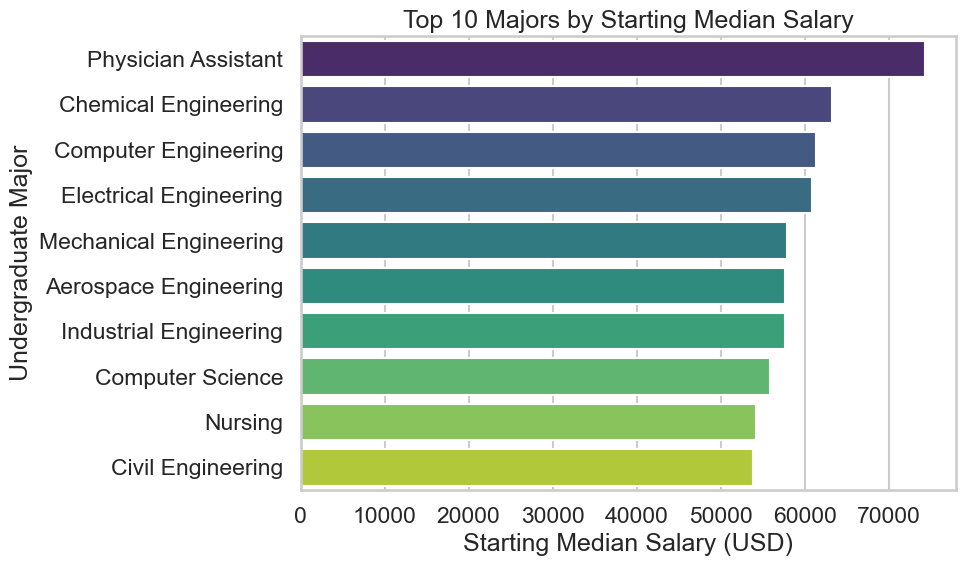

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_starting, y='Undergraduate Major', x='Starting Median Salary', palette='viridis')
plt.xlabel('Starting Median Salary (USD)')
plt.title('Top 10 Majors by Starting Median Salary')
plt.tight_layout()
plt.show()

## 2) Which majors have the lowest earnings after college?
We'll look at mid-career median salary to identify low-earning majors.

In [10]:
lowest_midcareer = df.sort_values(by='Mid-Career Median Salary', ascending=True).head(10)
lowest_midcareer[['Undergraduate Major','Mid-Career Median Salary']].style.format({'Mid-Career Median Salary':'${:,.0f}'})

,Undergraduate Major,Mid-Career Median Salary
18,Education,"$52,000"
47,Religion,"$52,000"
49,Spanish,"$53,100"
32,Interior Design,"$53,200"
39,Music,"$55,000"
41,Nutrition,"$55,300"
15,Criminal Justice,"$56,300"
16,Drama,"$56,900"
29,Hospitality & Tourism,"$57,500"
48,Sociology,"$58,200"


C:\Users\angel\AppData\Local\Temp\ipykernel_39984\1219332016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_midcareer, y='Undergraduate Major', x='Mid-Career Median Salary', palette='magma')


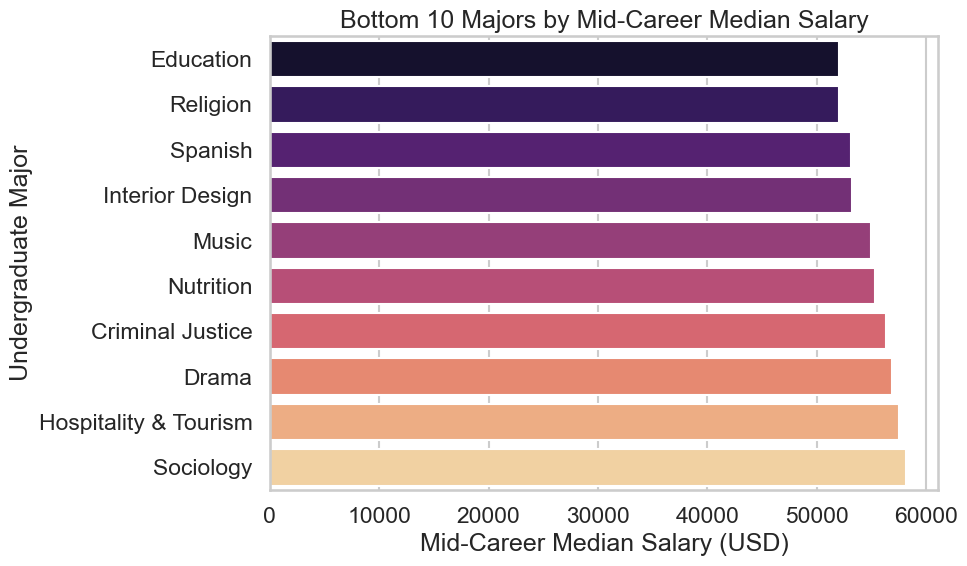

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data=lowest_midcareer, y='Undergraduate Major', x='Mid-Career Median Salary', palette='magma')
plt.xlabel('Mid-Career Median Salary (USD)')
plt.title('Bottom 10 Majors by Mid-Career Median Salary')
plt.tight_layout()
plt.show()

## 3) Which degrees have the highest earning potential?
We will use the `Mid-Career 90th Percentile Salary` as a proxy for potential high earnings.

In [12]:
top_potential = df.sort_values(by='Mid-Career 90th Percentile Salary', ascending=False).head(10)
top_potential[['Undergraduate Major','Mid-Career 90th Percentile Salary']].style.format({'Mid-Career 90th Percentile Salary':'${:,.0f}'})

,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,"$210,000"
22,Finance,"$195,000"
8,Chemical Engineering,"$194,000"
37,Math,"$183,000"
44,Physics,"$178,000"
36,Marketing,"$175,000"
30,Industrial Engineering,"$173,000"
14,Construction,"$171,000"
42,Philosophy,"$168,000"
19,Electrical Engineering,"$168,000"


C:\Users\angel\AppData\Local\Temp\ipykernel_39984\1868081382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_potential, y='Undergraduate Major', x='Mid-Career 90th Percentile Salary', palette='cubehelix')


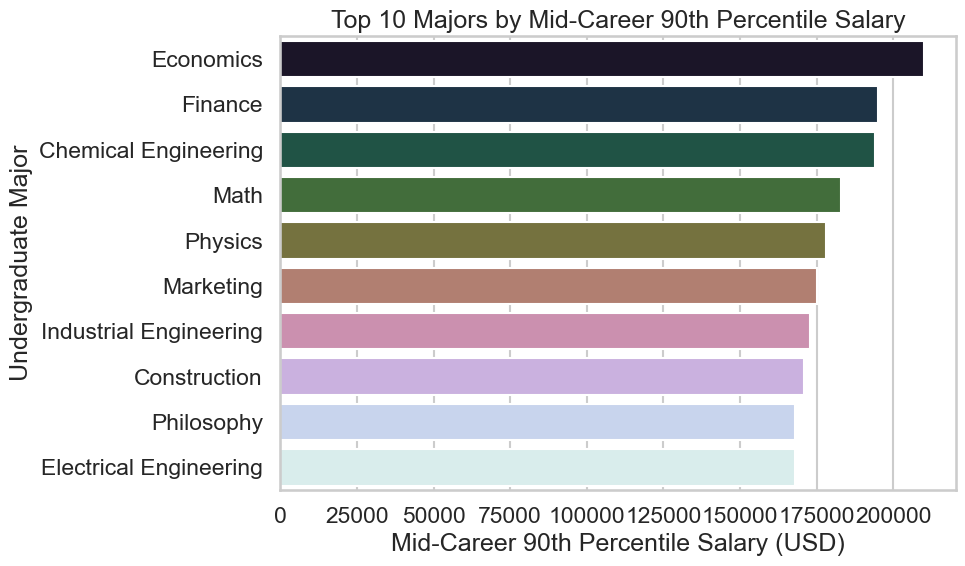

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_potential, y='Undergraduate Major', x='Mid-Career 90th Percentile Salary', palette='cubehelix')
plt.xlabel('Mid-Career 90th Percentile Salary (USD)')
plt.title('Top 10 Majors by Mid-Career 90th Percentile Salary')
plt.tight_layout()
plt.show()

## 4) What are the lowest risk college majors from an earnings standpoint?
We'll measure risk as the difference between the 90th and 10th percentile (`Mid-Career 90th Percentile Salary` - `Mid-Career 10th Percentile Salary`). Low difference suggests lower upside but also lower downside volatility.

In [14]:
df['mid_spread'] = df['Mid-Career 90th Percentile Salary'] - df['Mid-Career 10th Percentile Salary']
low_risk = df.sort_values(by='mid_spread').head(10)
low_risk[['Undergraduate Major','Mid-Career 10th Percentile Salary','Mid-Career 90th Percentile Salary','mid_spread']].style.format({'Mid-Career 10th Percentile Salary':'${:,.0f}','Mid-Career 90th Percentile Salary':'${:,.0f}','mid_spread':'${:,.0f}'})

,Undergraduate Major,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,mid_spread
40,Nursing,"$47,600","$98,300","$50,700"
43,Physician Assistant,"$66,400","$124,000","$57,600"
41,Nutrition,"$33,900","$99,200","$65,300"
49,Spanish,"$31,000","$96,400","$65,400"
27,Health Care Administration,"$34,600","$101,000","$66,400"
47,Religion,"$29,700","$96,400","$66,700"
23,Forestry,"$41,000","$111,000","$70,000"
32,Interior Design,"$35,700","$107,000","$71,300"
18,Education,"$29,300","$102,000","$72,700"
15,Criminal Justice,"$32,200","$107,000","$74,800"


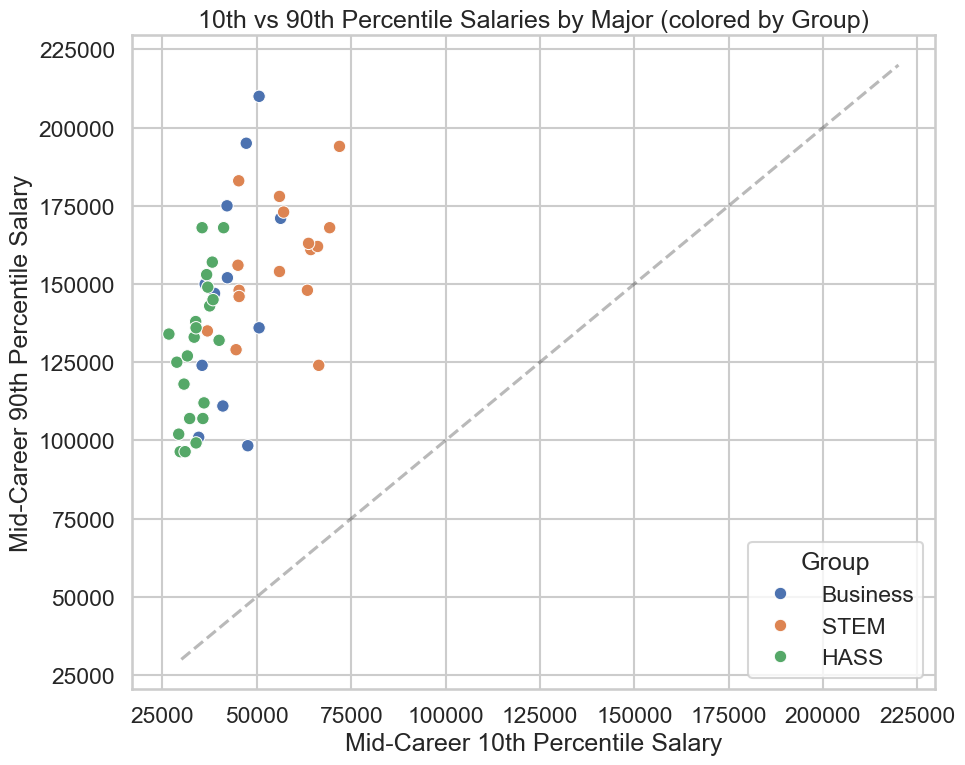

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Mid-Career 10th Percentile Salary', y='Mid-Career 90th Percentile Salary', hue='Group', s=80)
plt.plot([30000,220000],[30000,220000],'k--', alpha=0.3)
plt.xlabel('Mid-Career 10th Percentile Salary')
plt.ylabel('Mid-Career 90th Percentile Salary')
plt.title('10th vs 90th Percentile Salaries by Major (colored by Group)')
plt.tight_layout()
plt.show()

## 5) Do Business, STEM or HASS degrees earn more on average?
We'll compute average starting and mid-career median salaries by `Group` and compare.

In [16]:
group_stats = df.groupby('Group')[['Starting Median Salary','Mid-Career Median Salary']].mean().sort_values(by='Mid-Career Median Salary', ascending=False)
group_stats.style.format({'Starting Median Salary':'${:,.0f}','Mid-Career Median Salary':'${:,.0f}'})

,Starting Median Salary,Mid-Career Median Salary
Group,,
STEM,"$53,862","$90,812"
Business,"$44,633","$75,083"
HASS,"$37,186","$62,968"


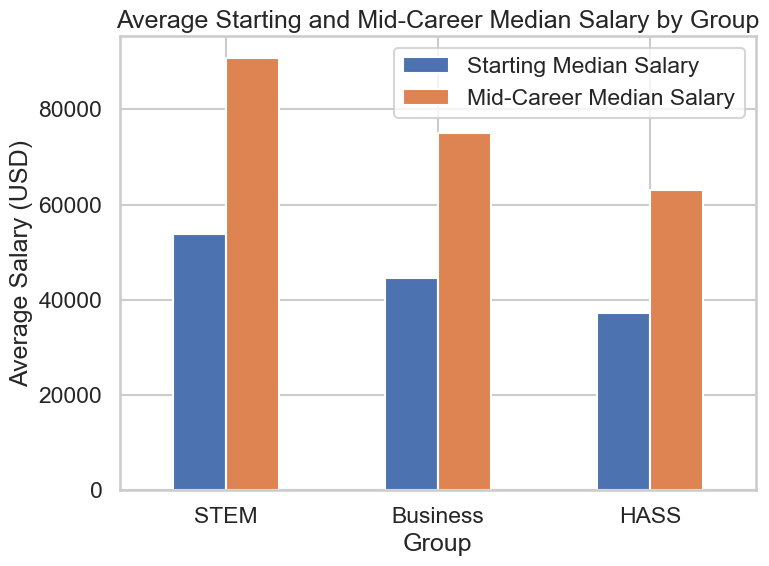

In [17]:
group_stats.plot(kind='bar', figsize=(8,6))
plt.ylabel('Average Salary (USD)')
plt.title('Average Starting and Mid-Career Median Salary by Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Conclusions and next steps
- The notebook above answers the requested questions using simple summary statistics and visualizations.
- Next steps: create interactive plots (plotly), run regression analyses controlling for major characteristics, or expand the dataset.

